# MEGALINE ~ Prepaid Plan Analysis

This study aims to break down the nuances between prepaid products of 'Surf' and 'Ultimate' made available by Megaline, of which we will ascertain which of the two has made the most traction in terms of overall revenue. The goal is to determine which plan will warrant additional budget allocation towards its advertising and promotional activities. Our data comprises 500 Megaline customers for the year 2018 and are of random demographics. We will predominantly look at the behavioural patterns of both sets of users and to a lesser extent, their demographics. <br><br>  Below is a summary of how we intend to process our revenue analysis
<br>
<br>
1. We need to look at user behaviours between the populations of both prepaid plans. If they are largely different, we may surmise that Megaline may want to look at two different marketing plans and strategies for two separate types of population. If they are similar, we may suggest a bigger focus on the plan that generates the most revenue.
2. User demographics will also play a role to a smaller extent, whereby we can ascertain if both prepaid plan populations have similar characteristics or differing ones; for example, a bigger market like LA, NY and Chicago possesses a higher per-capita real gross GDP and thus a higher average income bracket when compared to smaller markets in the States.  
3. Our main strategy in determining revenue generation boils down to our baseline plan prices. In other words, how much more revenue generated on average by users of a certain plan on top of their default monthly plan rates.

# Table of contents
1. [Initial Hypothesis](#hypothesis)
2. [Initialization](#initialization)
3. [Data Preprocessing](#dp)
    * 3.1 [Plans Data](#dpplans)
    * 3.2 [Users Data](#dpusers)
    * 3.3 [Call Data](#dpcall)
    * 3.4 [Internet Data](#dpinternet)
    * 3.5 [Messages Data](#dpmessages)
4. [Features Engineering](#fe)
    * 4.1 [df_users](#feusers)
    * 4.2 [df_calls](#fecalls)
    * 4.3 [df_internet](#feinternet)
    * 4.4 [df_messages](#femessages)
5. [Data Transformation](#dt)
    * 5.1 [Monthly Usage, per User](#dt1)
    * 5.2 [Mothly Surcharge, per User](#dt2)
        * 5.2.1 [Calls Surcharge](#dt21)
        * 5.2.2 [Internet Surcharge](#dt22)
        * 5.2.3 [Messages Surcharge](#dt23)   
        * 5.2.4 [Merging Usage, Surcharge, User Information & Plan Prices](#dt24) 
    * 5.3 [Monthly Revenue for user](#dt3)
6. [User Behaviour Study](#ub)
    * 6.1 [Calls](#ub1)
    * 6.2 [Internet](#ub2)
    * 6.3 [Messages](#ub3)
    * 6.4 [Age Group](#ub4)
    * 6.5 [Location](#ub5)
7. [Revenue Study](#revenue)
8. [Statistical Hypothesis Testing](#hypo)
    * 8.1 [Average revenue from users of the Ultimate and Surf calling plans differs](#hypo1)
    * 8.2 [Average revenue from users in the NY-NJ area differs from that of the users from the other regions ](#hypo2)
9. [General Conclusion](#gc)
    * 9.1 [Data Cleaning Overview](#gc1)
    * 9.2 [Features Engineering Overview](#gc2)
    * 9.3 [Data Transformation Overview](#gc3)
    * 9.4 [Conclusive Overview on Revenue](#gc4)

# 1. Initial Hypothesis <a id="hypothesis"> </a>

<u>Users of the cheaper Surf plan, who are of the mindset of "pay for what you will use/need", will generate more revenue in contrast to the Ultimate plan, as it is more likely for those users to exceed their call, internet and message limits.<u/>

# 2. Initialization <a name="initialization"></a>

In [148]:
# Loading libraries:

import pandas as pd
import numpy as np
import math as mt
import scipy.stats as st
import matplotlib.pyplot as plt 

In [149]:
# Loading DataFrames:

try: 
    df_users = pd.read_csv('megaline_users.csv')
    df_plans = pd.read_csv('megaline_plans.csv')
    df_calls = pd.read_csv('megaline_calls.csv')
    df_internet = pd.read_csv('megaline_internet.csv')
    df_messages = pd.read_csv('megaline_messages.csv')
    
except: 
    df_users = pd.read_csv('/datasets/megaline_users.csv')
    df_plans = pd.read_csv('/datasets/megaline_plans.csv')
    df_calls = pd.read_csv('/datasets/megaline_calls.csv')
    df_internet = pd.read_csv('/datasets/megaline_internet.csv')
    df_messages = pd.read_csv('/datasets/megaline_messages.csv')

# 3. Data Pre-processing <a name="dp"></a>

## 3.1. Plans Data <a name="dpplans"></a>

In [150]:
# Checking our df_plans DataFrame as it contains critical measurements for the rest of our data:

df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Our column for included internet is measured in Megabytes, when the rest of our data is in Gigabytes. Our column name 'plan_name' also appears to be different from a similar column in our 'df_user' dataset.  We will rename 'mb_per_month_included' to 'gb_included and convert its values to the appropriate unit of measurement, whereas 'plan_name' will be renamed to 'plan'.

In [151]:
# Renaming our included internet standard of measurement:

df_plans = df_plans.rename(columns = {'mb_per_month_included': 'gb_included'})


In [152]:
# Replacing our MB values with its corresponding GB measurements:

df_plans['gb_included'] = (df_plans['gb_included'] / 1024).astype(int)


In [153]:
# Renaming 'plan_name' to 'plan':

df_plans.rename(columns = {'plan_name':'plan'}, inplace = True)

In [154]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   messages_included  2 non-null      int64  
 1   gb_included        2 non-null      int32  
 2   minutes_included   2 non-null      int64  
 3   usd_monthly_pay    2 non-null      int64  
 4   usd_per_gb         2 non-null      int64  
 5   usd_per_message    2 non-null      float64
 6   usd_per_minute     2 non-null      float64
 7   plan               2 non-null      object 
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 248.0+ bytes


## 3.2. Users Data <a name="dpusers"></a>

In [155]:
# Checking our users dataset:

display(df_users.head())
df_users.info()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [156]:
# Getting a statistical overview our user data:

df_users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [157]:
# Checking for duplicates:

df_users.duplicated().sum()

0

**Obvious Fixes:**
1. No Duplicates found
2. Missing Values found in 'churn_date', but that is due to those particular entries still being subscribed to the service. We will fill these with the last day of the 2018 calender, as this represents the maximum DateTime limit of our dataset.
3. Converting to DateTime objects for columns "reg_date" and "churn_date"
4. The city column can be further split into city and state

In [158]:
# Converting 'reg_date' and 'churn_date' to DateTime objects:

df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

In [159]:
# Getting a column of states:

df_users.insert(loc=5, 
                column='state', 
                value=(df_users['city'].str.split(', ').str[1]).str.split().str[0]
               )

In [160]:
# Getting a column of cities:

df_users['city'] = df_users['city'].str.split(', ').str[0]

In [161]:
# Filling in our missing values with the last day of 2018 calender:

df_users['churn_date'] = df_users['churn_date'].fillna('2018-12-31')

In [162]:
# Last check:

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   state       500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   plan        500 non-null    object        
 8   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 35.3+ KB


## 3.3. Call Data <a id="dpcall"></a>

In [163]:
# Checking our Call dataset:

display(df_calls.info())
df_calls.tail(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None

,id,user_id,call_date,duration
137720,1499_189,1499,2018-12-27,0.00
137721,1499_190,1499,2018-09-03,7.82
137722,1499_191,1499,2018-12-24,0.00
137723,1499_192,1499,2018-11-27,8.27
137724,1499_193,1499,2018-10-22,7.22
137725,1499_194,1499,2018-10-31,0.00
137726,1499_195,1499,2018-09-16,1.39
137727,1499_196,1499,2018-11-22,0.27
137728,1499_197,1499,2018-12-27,8.36
137729,1499_198,1499,2018-10-26,6.41


In [164]:
#getting a statistical overview of call data:

df_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [165]:
# Checking for duplicates:

df_calls.duplicated().sum()

0

**Obvious Fixes:**

1. No obvious duplicates.
2. 'id' will be renamed 'call_id'.
2. 'call_id' will be positioned after 'user_id' for better readability.
3. 'call_date' needs to be converted to the DateTime type.
4. 'duration' needs to be rounded up to the next minute, as Megaline charges by minute intervals.
5. 'duration' has some 0.00 values that indicate that the user did not get through to other line. These will be dropped as they do not provide any useful information towards our main goal and will skew our computed averages later on. 

In [166]:
# Renaming 'id' to 'call_id':

df_calls.rename(columns = {'id':'call_id'}, inplace = True)

In [167]:
# Switching positions of 'call_id' and 'user_id'

cols = list(df_calls.columns)
a, b = cols.index('call_id'), cols.index('user_id')
cols[b], cols[a] = cols[a], cols[b]
df_calls = df_calls[cols]

In [168]:
# Converting 'call_date' to the DateTime type:

df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

In [169]:
# Rounding up 'duration' to the next minute:

df_calls['duration'] = np.ceil(df_calls['duration'])

In [170]:
# Converting 'duration' from float to int types:

df_calls['duration'] = df_calls['duration'].astype('int')

In [171]:
# Dropping 'duration' == 0 entries:

df_calls = df_calls.drop(df_calls.query("duration == 0").index)

df_calls.reset_index(drop=True, inplace=True)

In [172]:
# Last Check:

df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110901 entries, 0 to 110900
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   user_id    110901 non-null  int64         
 1   call_id    110901 non-null  object        
 2   call_date  110901 non-null  datetime64[ns]
 3   duration   110901 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 3.0+ MB


## 3.4. Internet Data <a name="dpinternet"></a>

In [173]:
# Checking our Internet dataset:

display(df_internet.info())
df_internet.head(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None

,id,user_id,session_date,mb_used
0,1000_13,1000,12/29/2018,89.86
1,1000_204,1000,12/31/2018,0.00
2,1000_379,1000,12/28/2018,660.40
3,1000_413,1000,12/26/2018,270.99
4,1000_442,1000,12/27/2018,880.22
5,1001_0,1001,8/24/2018,284.68
6,1001_3,1001,12/9/2018,656.04
7,1001_4,1001,11/4/2018,16.97
8,1001_10,1001,11/27/2018,135.18
9,1001_15,1001,12/13/2018,761.92


In [174]:
# Getting a statistical overview of internet data:

df_internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [175]:
# Checking for duplicates:

df_internet.duplicated().sum()

0

**Obvious Fixes:**

1. No obvious duplicates found.
2. 'id' will be renamed to 'session_id'.
3. Positions of 'session_id' and 'user_id' will be switched for better readability.
4. 'session_date' will be converted to the DateTime type.
5. 'mb_used' will be renamed to 'gb_used' as we are interested in the latter unit of measurement.
6. 'gb_used' will be converted to the GB unit of measurement.
7. 'gb_used appear to have 0.00 values; these could potentially indicate a user turning on their data, but not actually surfing the internet. These will be dropped as they do not provide any useful information towards our main goal and will skew our computed averages later on.

In [176]:
# Renaming 'id' to 'session_id'

df_internet.rename(columns = {'id':'session_id'}, inplace = True)

In [177]:
# Switching positions of 'session_id' and 'user_id'

cols = list(df_internet.columns)
a, b = cols.index('session_id'), cols.index('user_id')
cols[b], cols[a] = cols[a], cols[b]
df_internet = df_internet[cols]

In [178]:
# Converting 'session_date' to the DateTime type:

df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%m/%d/%Y')

In [179]:
# Renaming 'mb_used' to 'gb_used'

df_internet.rename(columns = {'mb_used':'gb_used'}, inplace = True)

In [180]:
# Converting 'gb_used' values from MB unit of measurement to GB

df_internet['gb_used'] = df_internet['gb_used'] / 1024

In [181]:
# Dropping 'gb_used' == 0 entries:

df_internet = df_internet.drop(df_internet.query("gb_used == 0").index)
df_internet.reset_index(drop=True, inplace=True)

In [182]:
# Last check:

df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91078 entries, 0 to 91077
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       91078 non-null  int64         
 1   session_id    91078 non-null  object        
 2   session_date  91078 non-null  datetime64[ns]
 3   gb_used       91078 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.8+ MB


## 3.5. Messages Data <a name="dpmessages"></a>

In [183]:
# Checking our Messages dataset:

display(df_messages.info())
df_messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [184]:
# Checking for duplicates:

df_messages.duplicated().sum()

0

**Obvious Fixes:**

1. 'id' will be renamed to 'message_id'
2. Positions of 'message_id' and 'user_id' will be switched for better readability.
3. 'message_date' will be converted to the DateTime type.

In [185]:
# Renaming 'id' to 'message_id':

df_messages.rename(columns = {'id':'message_id'}, inplace = True)

In [186]:
# Switching positions between 'message_id' and 'user_id':

cols = list(df_messages.columns)
a, b = cols.index('message_id'), cols.index('user_id')
cols[b], cols[a] = cols[a], cols[b]
df_messages = df_messages[cols]

In [187]:
# Converting 'message_date' to the DateTime type:

df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

In [188]:
# Last check:

df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       76051 non-null  int64         
 1   message_id    76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


# 4. Features Engineering <a name="fe"></a>

## 4.1. df_users <a name="feusers"></a>

In [189]:
# Creating a column of age groups based on 'age':

df_users.age.value_counts().sort_index()                  # Getting our minimum and maximum age values for our dictionary

bins = [0, 19, 29, 39, 49, 59, 69, 79]
names = ['10s', '20s', '30s', '40s', '50s', '60s', '70s']

df_users.insert(loc=4, column='age_group', value=(pd.cut(df_users['age'], bins, labels=names)))

In [190]:
# Creating a column of total observed days subscribed to a prepaid plan:

df_users['lifetime_days'] = (df_users['churn_date'] - df_users['reg_date']).dt.days

In [191]:
# Creating a column of total observed months subscribed to a prepaid plan:


df_users['lifetime_months'] = df_users['churn_date'].dt.to_period('M').view(dtype='int64') - \
                            df_users['reg_date'].dt.to_period('M').view(dtype='int64')


In [192]:
# Investigating lifetime_months == 0:

df_users.query("lifetime_months == 0")

,user_id,first_name,last_name,age,age_group,city,state,reg_date,plan,churn_date,lifetime_days,lifetime_months
0,1000,Anamaria,Bauer,45,40s,Atlanta-Sandy Springs-Roswell,GA,2018-12-24,ultimate,2018-12-31,7,0
13,1013,Nicolas,Snider,50,50s,Knoxville,TN,2018-12-01,ultimate,2018-12-31,30,0
15,1015,Beata,Carpenter,26,20s,Pittsburgh,PA,2018-12-05,surf,2018-12-31,26,0
21,1021,Ricarda,Booker,37,30s,Los Angeles-Long Beach-Anaheim,CA,2018-12-21,surf,2018-12-31,10,0
35,1035,Jeff,Cummings,67,60s,Charlotte-Concord-Gastonia,NC-SC,2018-12-08,surf,2018-12-31,23,0
40,1040,Paris,Santos,72,70s,Philadelphia-Camden-Wilmington,PA-NJ-DE-MD,2018-12-23,surf,2018-12-30,7,0
51,1051,Rosario,Gibbs,55,50s,San Diego-Chula Vista-Carlsbad,CA,2018-12-11,surf,2018-12-31,20,0
92,1092,Taren,Strickland,26,20s,Dallas-Fort Worth-Arlington,TX,2018-12-10,surf,2018-12-31,21,0
93,1093,Karima,Hampton,69,60s,Nashville-Davidson–Murfreesboro–Franklin,TN,2018-12-17,surf,2018-12-31,14,0
96,1096,Song,Cline,28,20s,New York-Newark-Jersey City,NY-NJ-PA,2018-12-22,ultimate,2018-12-31,9,0


**Intermediate Conclusion:** 
<br>
It looks like our {0} lifetime_month values are due to the fact these particular customers had only just signed up for a prepaid plan in the last month of 2018. We will replace these values with 1 as it represents a service uptake of a month or less.

In [193]:
# Replacing {0} lifetime month values with {1}:

df_users.loc[df_users['lifetime_months'] == 0, 'lifetime_months'] = 1

## 4.2. df_calls <a name="fecalls"></a>

In [194]:
# Extracting monthly call values from 'call_date'

df_calls.insert(loc=3, column='month', value=(df_calls.call_date.dt.month))

## 4.3. df_internet <a name="feinternet"></a>

In [195]:
# Extracting monthly internet session values from 'session_date'

df_internet.insert(loc=3, column='month', value=(df_internet.session_date.dt.month))

## 4.4. df_messages <a name="femessages"></a>

In [196]:
# Extracting monthly message values from 'message_date'

df_messages.insert(loc=3, column='month', value=(df_messages.message_date.dt.month))

# 5. Data Transformation <a name="dt"></a>

## 5.1 Monthly Usage, per User. <a name="dt1"></a>

In [197]:
# Getting totals for calls made and call duration by each month:

df_calls_total = df_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])

df_calls_total.columns = ['calls_made', 'calls_duration']               # Changing column names for readability
df_calls_total = df_calls_total.reset_index(level=[0,1])                # Resetting multi-index

df_calls_total = df_calls_total.merge(df_users[['user_id', 'plan']], on='user_id')  # Retrieving respective plans chosen
                

In [198]:
# Getting total data volume for each month:

df_internet_total = df_internet.pivot_table(index=['user_id', 'month'], values='gb_used', aggfunc='sum')

df_internet_total.columns = ['data_used']                               # Changing column names for readability
df_internet_total = df_internet_total.reset_index(level=[0,1])          # Resetting multi-index

df_internet_total = df_internet_total.merge(df_users[['user_id', 'plan']], on='user_id')  # Retrieving respective plans chosen

In [199]:
# Getting totals for messages sent in each month:

df_messages_total = df_messages.pivot_table(index=['user_id', 'month'], values='message_id', aggfunc='count')

df_messages_total.columns = ['messages_sent']                           # Changing column names for readability
df_messages_total = df_messages_total.reset_index(level=[0,1])          # Resetting multi-index

df_messages_total = df_messages_total.merge(df_users[['user_id', 'plan']], on='user_id')  # Retrieving respective plans chosen

In [200]:
# Merging all metric DataFrames:

df = (df_internet_total
                  .merge(df_calls_total, on=['user_id', 'plan', 'month'], how='outer')
                  .merge(df_messages_total, on=['user_id', 'plan', 'month'], how='outer')
                 )
                      

In [201]:
# Replacing all NaN values that represent null usages for a particular month with {0}:

df = df.fillna(0)

## 5.2 Monthly Surcharge, per User. <a name="dt2"></a>

### 5.2.1 Calls Surcharge: <a name="dt21"></a>

In [202]:
# Merging plan rates with df:

df_calls_surcharge = df.merge(df_plans[['minutes_included', 'usd_per_minute', 'plan']], on='plan')

In [203]:
# Getting monthly surcharge per month, per user for the call category:

def define_call_surcharge(row):
    
    plan = row['plan']
    calls_duration = row['calls_duration']
    minutes_included = row['minutes_included']
    rate = row['usd_per_minute']
    

    if plan == 'surf':
        if calls_duration <= minutes_included:
            return 0
        elif calls_duration > minutes_included:
            return (calls_duration - minutes_included) * rate        
    elif plan == 'ultimate':
        if calls_duration <= minutes_included:
            return 0
        elif calls_duration > minutes_included:
            return (calls_duration - minutes_included) * rate
        
df_calls_surcharge['calls_surcharge'] = df_calls_surcharge.apply(define_call_surcharge, axis=1)
        

In [204]:
# Overview of our new table:

df_calls_surcharge.head()

,user_id,month,data_used,plan,calls_made,calls_duration,messages_sent,minutes_included,usd_per_minute,calls_surcharge
0,1000,12,1.856904,ultimate,16.0,124.0,11.0,3000,0.01,0.0
1,1006,11,2.019893,ultimate,2.0,10.0,15.0,3000,0.01,0.0
2,1006,12,31.366035,ultimate,7.0,59.0,139.0,3000,0.01,0.0
3,1008,10,16.706045,ultimate,54.0,476.0,21.0,3000,0.01,0.0
4,1008,11,23.121797,ultimate,50.0,446.0,37.0,3000,0.01,0.0


In [205]:
# Dropping unnecessary columns:

df_calls_surcharge.drop(['minutes_included', 'usd_per_minute'], inplace=True, axis=1)

### 5.2.2 Internet Surcharge: <a name="dt22"></a>

In [206]:
# Merging plan rates with df:

df_internet_surcharge = df.merge(df_plans[['gb_included', 'usd_per_gb', 'plan']], on='plan')

In [207]:
# Getting monthly surcharge per month, per user for the internet category:


def define_internet_surcharge(row):
    
    plan = row['plan']
    data_used = row['data_used']
    gb_included = row['gb_included']
    rate = row['usd_per_gb']
    
    

    if plan == 'surf':
        if data_used <= gb_included:
            return 0
        elif data_used > gb_included:
            return np.ceil(data_used - gb_included) * rate 
        # rounding up our gb values once they have surpassed the included gb threshold  
        
    elif plan == 'ultimate':
        if data_used <= gb_included:
            return 0
        elif data_used > gb_included:
            return np.ceil(data_used - gb_included) * rate
        # rounding up our gb values once they have surpassed the included gb threshold 
        
df_internet_surcharge['internet_surcharge'] = df_internet_surcharge.apply(define_internet_surcharge, axis=1)
        

In [208]:
# Getting an overview:

df_internet_surcharge.head()

,user_id,month,data_used,plan,calls_made,calls_duration,messages_sent,gb_included,usd_per_gb,internet_surcharge
0,1000,12,1.856904,ultimate,16.0,124.0,11.0,30,7,0.0
1,1006,11,2.019893,ultimate,2.0,10.0,15.0,30,7,0.0
2,1006,12,31.366035,ultimate,7.0,59.0,139.0,30,7,14.0
3,1008,10,16.706045,ultimate,54.0,476.0,21.0,30,7,0.0
4,1008,11,23.121797,ultimate,50.0,446.0,37.0,30,7,0.0


In [209]:
# Dropping unncessary columns:

df_internet_surcharge.drop(['gb_included', 'usd_per_gb'], inplace=True, axis=1)

### 5.2.3 Messages Surcharge: <a name="dt23"></a>

In [210]:
# Merging plan rates with df:

df_messages_surcharge = df.merge(df_plans[['messages_included', 'usd_per_message', 'plan']], on='plan')

In [211]:
# Getting monthly surcharge per month, per user for the messages category:

def define_messages_surcharge(row):
    
    plan = row['plan']
    messages_sent = row['messages_sent']
    messages_included = row['messages_included']
    rate = row['usd_per_message']


    if plan == 'surf':
        if messages_sent <= messages_included:
            return 0
        elif messages_sent > messages_included:
            return (messages_sent - messages_included) * rate        
    elif plan == 'ultimate':
        if messages_sent <= messages_included:
            return 0
        elif messages_sent > messages_included:
            return (messages_sent - messages_included) * rate
        
df_messages_surcharge['messages_surcharge'] = df_messages_surcharge.apply(define_messages_surcharge, axis=1)

In [212]:
# Getting an overview:

df_messages_surcharge.head()

,user_id,month,data_used,plan,calls_made,calls_duration,messages_sent,messages_included,usd_per_message,messages_surcharge
0,1000,12,1.856904,ultimate,16.0,124.0,11.0,1000,0.01,0.0
1,1006,11,2.019893,ultimate,2.0,10.0,15.0,1000,0.01,0.0
2,1006,12,31.366035,ultimate,7.0,59.0,139.0,1000,0.01,0.0
3,1008,10,16.706045,ultimate,54.0,476.0,21.0,1000,0.01,0.0
4,1008,11,23.121797,ultimate,50.0,446.0,37.0,1000,0.01,0.0


In [213]:
# Dropping unnecessary columns:

df_messages_surcharge.drop(['messages_included', 'usd_per_message'], inplace=True, axis=1)

### 5.2.4 Merging Usage, Surcharge, User Information & Plan Prices:  <a name="dt24"></a>

In [214]:
# Combining surcharge data for all 3 metrics:

df_surcharge = (df_calls_surcharge
      .merge(df_internet_surcharge, 
             on=['user_id', 'month', 'plan', 'calls_made', 'calls_duration', 'data_used', 'messages_sent'], how='outer')
      .merge(df_messages_surcharge,
             on=['user_id', 'month', 'plan', 'calls_made', 'calls_duration', 'data_used', 'messages_sent'], how='outer')
               )          

In [215]:
# Merging combined surcharge data to our main DataFrame:

df = df.merge(df_surcharge, 
              on=['user_id', 'month', 'plan', 'calls_made', 'calls_duration', 'data_used', 'messages_sent'])

In [216]:
# Merging plan prices to our main DataFrame:

df = df.merge(df_plans[['plan', 'usd_monthly_pay']], on='plan')

In [217]:
# Merging customer information columns to our main DataFrame:

df = df.merge(df_users[['user_id', 'age_group', 'city']], on='user_id', how='inner')

In [218]:
# Checking our new DataFrame:

df.head()

,user_id,month,data_used,plan,calls_made,calls_duration,messages_sent,calls_surcharge,internet_surcharge,messages_surcharge,usd_monthly_pay,age_group,city
0,1000,12,1.856904,ultimate,16.0,124.0,11.0,0.0,0.0,0.0,70,40s,Atlanta-Sandy Springs-Roswell
1,1006,11,2.019893,ultimate,2.0,10.0,15.0,0.0,0.0,0.0,70,70s,San Francisco-Oakland-Berkeley
2,1006,12,31.366035,ultimate,7.0,59.0,139.0,0.0,14.0,0.0,70,70s,San Francisco-Oakland-Berkeley
3,1008,10,16.706045,ultimate,54.0,476.0,21.0,0.0,0.0,0.0,70,50s,Orlando-Kissimmee-Sanford
4,1008,11,23.121797,ultimate,50.0,446.0,37.0,0.0,0.0,0.0,70,50s,Orlando-Kissimmee-Sanford


In [219]:
# Rearranging columns for better readability:

df = df.iloc[:, np.r_[0, 1, 4:6, 2, 6, 3, -3, -2, -1, 7:10]]

In [220]:
df.head()

,user_id,month,calls_made,calls_duration,data_used,messages_sent,plan,usd_monthly_pay,age_group,city,calls_surcharge,internet_surcharge,messages_surcharge
0,1000,12,16.0,124.0,1.856904,11.0,ultimate,70,40s,Atlanta-Sandy Springs-Roswell,0.0,0.0,0.0
1,1006,11,2.0,10.0,2.019893,15.0,ultimate,70,70s,San Francisco-Oakland-Berkeley,0.0,0.0,0.0
2,1006,12,7.0,59.0,31.366035,139.0,ultimate,70,70s,San Francisco-Oakland-Berkeley,0.0,14.0,0.0
3,1008,10,54.0,476.0,16.706045,21.0,ultimate,70,50s,Orlando-Kissimmee-Sanford,0.0,0.0,0.0
4,1008,11,50.0,446.0,23.121797,37.0,ultimate,70,50s,Orlando-Kissimmee-Sanford,0.0,0.0,0.0


In [221]:
# Rounding up 'data_used' to the next Gb value because Megaline charges by 1Gb intervals:

df.data_used = np.ceil(df.data_used)

In [222]:
# Renaming 'usd_monthly_pay' to 'plan_price':

df = df.rename(columns = {'usd_monthly_pay': 'plan_price'})

In [223]:
# Sorting our new DataFrame by 'user_id'

df = df.sort_values(by='user_id').reset_index(drop=True)

In [224]:
# Converting all usage metric columns to the Int type:

df[['calls_made', 'calls_duration', 'data_used', 'messages_sent']] = \
df[['calls_made', 'calls_duration', 'data_used', 'messages_sent']].astype(int)

In [225]:
# Checking our final DataFrame before computing revenue values:

df.head()

,user_id,month,calls_made,calls_duration,data_used,messages_sent,plan,plan_price,age_group,city,calls_surcharge,internet_surcharge,messages_surcharge
0,1000,12,16,124,2,11,ultimate,70,40s,Atlanta-Sandy Springs-Roswell,0.0,0.0,0.00
1,1001,10,47,393,22,53,surf,20,20s,Seattle-Tacoma-Bellevue,0.0,70.0,0.09
2,1001,11,49,426,19,36,surf,20,20s,Seattle-Tacoma-Bellevue,0.0,40.0,0.00
3,1001,12,46,412,19,44,surf,20,20s,Seattle-Tacoma-Bellevue,0.0,40.0,0.00
4,1001,9,38,315,14,44,surf,20,20s,Seattle-Tacoma-Bellevue,0.0,0.0,0.00


## 5.3  Monthly Revenue for user. <a name="dt3"></a>

In [226]:
# Adding a revenue column containing the sum of all 3 surcharge metrics and their respective plan prices:

df['revenue'] = df.plan_price + df.calls_surcharge + df.internet_surcharge + df.messages_surcharge

In [227]:
# Checking our final DataFrame:

display(df.head())
display(df.describe())
df.info()

,user_id,month,calls_made,calls_duration,data_used,messages_sent,plan,plan_price,age_group,city,calls_surcharge,internet_surcharge,messages_surcharge,revenue
0,1000,12,16,124,2,11,ultimate,70,40s,Atlanta-Sandy Springs-Roswell,0.0,0.0,0.00,70.00
1,1001,10,47,393,22,53,surf,20,20s,Seattle-Tacoma-Bellevue,0.0,70.0,0.09,90.09
2,1001,11,49,426,19,36,surf,20,20s,Seattle-Tacoma-Bellevue,0.0,40.0,0.00,60.00
3,1001,12,46,412,19,44,surf,20,20s,Seattle-Tacoma-Bellevue,0.0,40.0,0.00,60.00
4,1001,9,38,315,14,44,surf,20,20s,Seattle-Tacoma-Bellevue,0.0,0.0,0.00,20.00


,user_id,month,calls_made,calls_duration,data_used,messages_sent,plan_price,calls_surcharge,internet_surcharge,messages_surcharge,revenue
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,1246.075883,9.172700,48.365024,429.283471,16.870475,33.166594,35.699956,1.264828,27.242041,0.144322,64.351147
std,143.051927,2.496386,26.202856,236.320077,7.796174,34.070085,23.210863,3.233992,48.571724,0.493515,46.624945
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,20.000000
25%,1122.000000,8.000000,30.000000,265.000000,12.000000,3.000000,20.000000,0.000000,0.000000,0.000000,23.480000
50%,1245.000000,10.000000,48.000000,425.000000,17.000000,26.000000,20.000000,0.000000,0.000000,0.000000,70.000000
75%,1368.000000,11.000000,64.000000,572.000000,21.000000,51.000000,70.000000,0.000000,40.000000,0.000000,70.000000
max,1499.000000,12.000000,167.000000,1510.000000,70.000000,266.000000,70.000000,30.300000,550.000000,6.480000,590.370000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   user_id             2293 non-null   int64   
 1   month               2293 non-null   int64   
 2   calls_made          2293 non-null   int32   
 3   calls_duration      2293 non-null   int32   
 4   data_used           2293 non-null   int32   
 5   messages_sent       2293 non-null   int32   
 6   plan                2293 non-null   object  
 7   plan_price          2293 non-null   int64   
 8   age_group           2293 non-null   category
 9   city                2293 non-null   object  
 10  calls_surcharge     2293 non-null   float64 
 11  internet_surcharge  2293 non-null   float64 
 12  messages_surcharge  2293 non-null   float64 
 13  revenue             2293 non-null   float64 
dtypes: category(1), float64(4), int32(4), int64(3), object(2)
memory usage: 199.8+ KB


**Data Transformation Recap:**
<br>
<br>
1. Calculated monthly [call, data and message] usage for each user.
2. Calculated monthly [call, data and message] surcharge for each user.
3. Calculated monthly revenue for each user by summing monthly surcharge and plan price.

# 6. User Behaviour Study <a name="ub"></a>

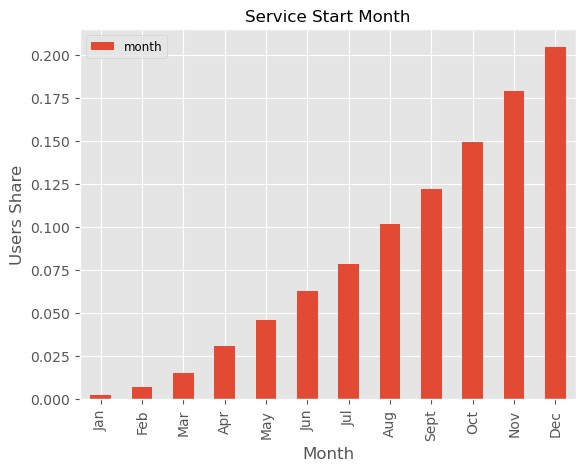

In [228]:
# Investigating when our users signed up:

df.month\
.value_counts(normalize=True)\
.sort_values(ascending=True)\
.plot(kind='bar')

plt.style.use('ggplot')
plt.title('Service Start Month', fontsize=12)
plt.legend(loc='upper left', prop={'size': 8.5})

plt.ylabel('Users Share', fontsize=12)
plt.xlabel('Month', fontsize=12)
(plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 
            labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"])
           )

plt.show()

**Observation:**
<br>
To study user behaviour, we need to focus more heavily on data from the months that contain an adequate population share. This being the months from May onwards which starts at close to a 5% population share.

## 6.1 Calls <a name="ubcalls"></a>

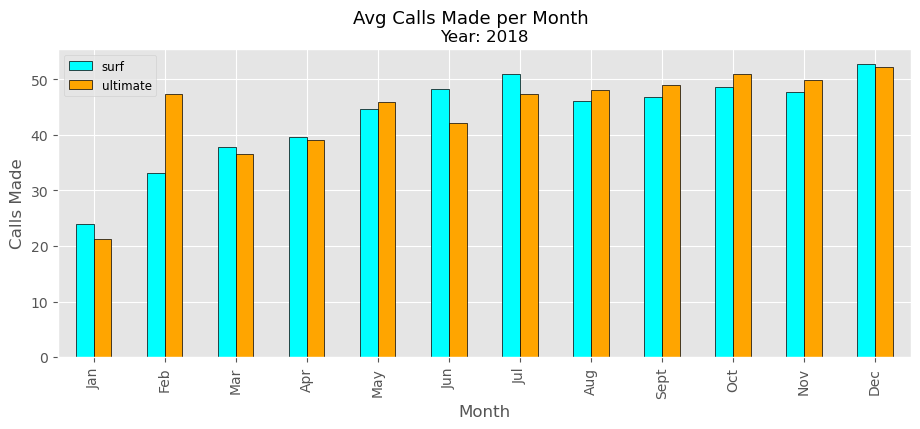

In [229]:
# Comparing average number of calls made by month for each plan:

(df
 .pivot_table(index='month', columns='plan', values='calls_made', aggfunc='mean')
 .plot(kind='bar', grid=True, edgecolor='black', color=['cyan', 'orange'], figsize=(11,4))
)

plt.style.use('ggplot')

plt.suptitle('Avg Calls Made per Month', fontsize=13)
plt.title('Year: 2018', fontsize=12)

plt.legend(loc='upper left', prop={'size': 8.5})

plt.ylabel('Calls Made', fontsize=12)
plt.xlabel('Month', fontsize=12)

(plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 
            labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"])
           )

plt.show()

In [230]:
# Getting the difference in means between both plans for overall monthly calls made:

print("Surf Calls Made [Mean]:",\
      df.query("plan == 'surf'").calls_made.mean())
print("Ultimate Calls Made [Mean]:",\
      df.query("plan == 'ultimate'").calls_made.mean())

Surf Calls Made [Mean]: 48.23712650985378
Ultimate Calls Made [Mean]: 48.644444444444446


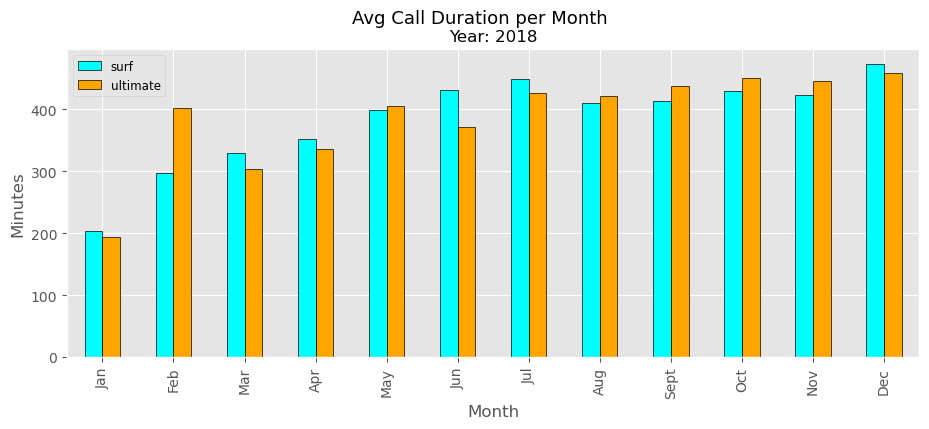

In [231]:
# Comparing average duration of calls by month of each plan:

(df
 .pivot_table(index='month', columns='plan', values='calls_duration', aggfunc='mean')
 .plot(kind='bar', grid=True, edgecolor='black', color=['cyan', 'orange'], figsize=(11,4))
)

plt.style.use('ggplot')

plt.suptitle('Avg Call Duration per Month', fontsize=13)
plt.title('Year: 2018', fontsize=12)

plt.legend(loc='upper left', prop={'size': 8.5})

plt.ylabel('Minutes', fontsize=12)
plt.xlabel('Month', fontsize=12)

(plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 
            labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"])
           )

plt.show()

In [232]:
# Getting the difference in means between both plans for overall monthly calls duration:

print("Surf Call Duration Mean:", df.query("plan == 'surf'").calls_duration.mean())
print("Ultimate Call Duration Mean:", df.query("plan == 'ultimate'").calls_duration.mean())

Surf Call Duration Mean: 428.7495232040687
Ultimate Call Duration Mean: 430.45


**Observations:**
<br>
As we have determined with our monthly population share, the first 4 months of our year have data scarcity, in that the majority of users signed up for a plan after the first 4 months, with an upward trend the further we got into our year. 
<br>
<br>For the months of May onwards, we can observe that users of both plans have similar behaviour, in that call usage hovers at an approximate average of 400 minutes and beyond, with the highest usage rate observed in December. We can infer this possibly coincides with the  year-end holidays. 
<br>
<br>There are minor differences however, with said differences being a slightly higher usage for our Surf users in the middle of the year, while users of the Ultimate plan start picking up towards the last quarter of the year, that is before ceding the lead back to Surf users in the month of December. But overall, very similar behavioural characteristics in terms of call usage, as seen with our means of 428 minutes (Surf) and 430 minutes (Ultimate). It appears like our Ultimate users are paying for minutes they're not using (3000 minutes), but their choice of plan could still be dictated by internet or messages.
<br>
<br> Our data total calls made per month are identical to our data on call duration. Users from both plans have a mean of approximately 48 calls made per month, which again shows similar behaviour between the two. 

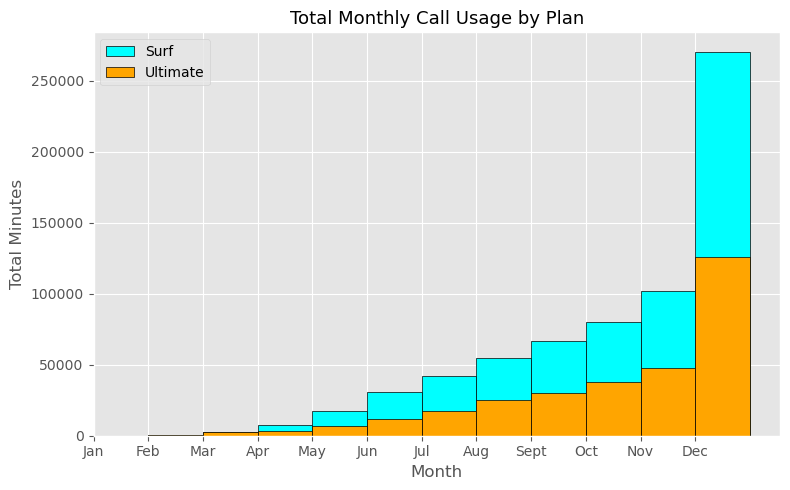

In [233]:
# Comparing the number of minutes users of each plan require each month:

surf = df.query("plan == 'surf'")
ult = df.query("plan == 'ultimate'")

plt.figure(figsize=(8,5))

plt.hist(x = surf['month'], weights=surf['calls_duration'], edgecolor='black',color='cyan',bins=11, label='Surf')
plt.hist(x = ult['month'], weights=ult['calls_duration'], edgecolor='black',color='orange',bins=11, label='Ultimate')


plt.style.use('ggplot')
plt.title('Total Monthly Call Usage by Plan', fontsize=13) 
plt.legend(loc='upper left')
plt.xlabel('Month')
plt.ylabel('Total Minutes')

(plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 
            labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"])
           )

plt.tight_layout()
 
plt.show()

In [234]:
# Calculating the ratio of Ultimate user compared to Surf users:

len(df.query("plan == 'ultimate'")) / len(df.query("plan == 'surf'"))

0.45772409408773046

In [235]:
# Calculating the monthly call duration mean and variance for each plan:

print("<Surf Users>")
print("Monthly call duration Mean: ", df.query("plan == 'surf'").calls_duration.mean())
print("Monthly call duration Variance: ", df.query("plan == 'surf'").calls_duration.var())
print()
print("<Ultimate Users>")
print("Monthly call duration Mean: ", df.query("plan == 'ultimate'").calls_duration.mean())
print("Monthly call duration Variance: ", df.query("plan == 'ultimate'").calls_duration.var())

<Surf Users>
Monthly call duration Mean:  428.7495232040687
Monthly call duration Variance:  54968.27946065032

<Ultimate Users>
Monthly call duration Mean:  430.45
Monthly call duration Variance:  57844.4648122392


**Observations:**
<br>
Our histogram of total minutes used for every month showed Ultimate users requiring approximately  slightly below half of Surf users throughout the year. But as we already know, the ratio of Ultimate users to Surf users is about 4.5 : 10. Thus, all things equal, we should see similar averages every month for both plans. We confirmed this by getting extremely similar monthly mean and variance values for both plans; 428 - 430 and 54968 - 57844 respectively. Again, this depicts similar behaviour.

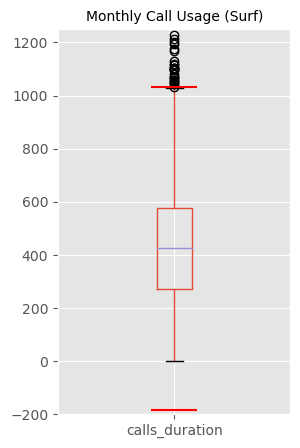

<Surf Plan>
Median:  425.0
Quartile 1: 272.0
Quartile 3: 576.0


In [236]:
# Plotting a boxplot to visualize the distribution of monthly call durations for all users of the Surf plan:

Q1 = df.query("plan == 'surf'")['calls_duration'].quantile(0.25)
Q3 = df.query("plan == 'surf'")['calls_duration'].quantile(0.75)
IQR = Q3 - Q1

(df
 .query("plan == 'surf'")
 .boxplot(column=['calls_duration'], grid=True, figsize=(3,5))
)

plt.title('Monthly Call Usage (Surf)', fontsize=10)

plt.ylim(-200, 1250)
plt.hlines(y=Q1-1.5*IQR, xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=Q3+1.5*IQR, xmin=0.9, xmax=1.1, color='red')

plt.show()

print("<Surf Plan>")
print("Median: ",  df.query("plan == 'surf'")['calls_duration'].median())
print("Quartile 1:", Q1)
print("Quartile 3:", Q3)

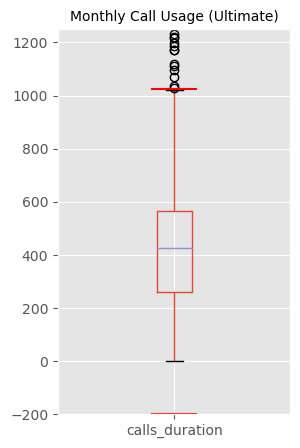

<Ultimate Plan>
Median:  424.0
Quartile 1: 260.0
Quartile 3: 565.25


In [237]:
# Plotting a boxplot to visualize the distribution of monthly call durations for all users of the Ultimate plan:

Q1 = df.query("plan == 'ultimate'")['calls_duration'].quantile(0.25)
Q3 = df.query("plan == 'ultimate'")['calls_duration'].quantile(0.75)
IQR = Q3 - Q1

(df
 .query("plan == 'ultimate'")
 .boxplot(column=['calls_duration'], grid=True, figsize=(3,5))
)

plt.title('Monthly Call Usage (Ultimate)', fontsize=10)

plt.ylim(-200, 1250)
plt.hlines(y=Q1-1.5*IQR, xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=Q3+1.5*IQR, xmin=0.9, xmax=1.1, color='red')

plt.show()

print("<Ultimate Plan>")
print("Median: ",  df.query("plan == 'ultimate'")['calls_duration'].median())
print("Quartile 1:", Q1)
print("Quartile 3:", Q3)

**Observations:**
<br>
Similar to our means and variances, our median values for both Surf and Ultimate plans (425, 424) together with their respective Q1,Q3 figures are within striking distance of each other. This depicts a similar behaviour between plans.

In [238]:
# Filtering out Surf outliers to get unskewed mean and variance values:

Q1 = df.query("plan == 'surf'")['calls_duration'].quantile(0.25)
Q3 = df.query("plan == 'surf'")['calls_duration'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

print("<Surf Plan>")
print()
print("Mean:", df.query("plan == 'surf'")\
        .query("calls_duration >= @lower and calls_duration <= @upper")['calls_duration'].mean())
print("Variance:", df.query("plan == 'surf'")\
        .query("calls_duration >= @lower and calls_duration <= @upper")['calls_duration'].var())

<Surf Plan>

Mean: 415.8828478964401
Variance: 46455.77706960447


In [239]:
# Filtering out Ultimate outliers to get unskewed mean and variance values:

Q1 = df.query("plan == 'ultimate'")['calls_duration'].quantile(0.25)
Q3 = df.query("plan == 'ultimate'")['calls_duration'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

print("<Ultimate Plan>")
print()
print("Mean:", df.query("plan == 'ultimate'") \
        .query("calls_duration >= @lower and calls_duration <= @upper")['calls_duration'].mean())
print("Variance:", df.query("plan == 'ultimate'") \
        .query("calls_duration >= @lower and calls_duration <= @upper")['calls_duration'].var())

<Ultimate Plan>

Mean: 413.51278409090907
Variance: 46036.07949494051


**Observation:**
<br>
After filtering out outliers, our central tendency measure and dispersion values still remain extremely close to one another.

**Intermediate Conclusion - Calls Data:**
<br> 
The bar and histogram plots, together with the statistics for both plans show no significant variations between each other. Most strikingly, our means, medians and dispersions show very similar characteristics, and hence we will conclude that users of the Surf and Ultimate plans possess similar behavioural characteristics when making calls. ***Just as important, is the fact that based solely off of average usage, users of the Surf plan have a lower buffer to exceeding their call plan limits (500 minutes). Ultimate users are very much far away from exceeding theirs (3000 minutes).***

## 6.2 Internet <a name="ubinternet"></a>

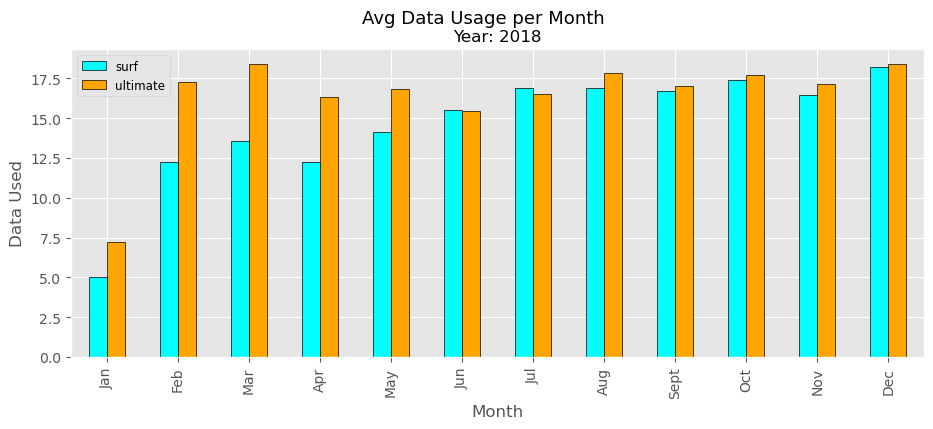

In [240]:
# Comparing average volume of data used by month for each plan:

(df
 .pivot_table(index='month', columns='plan', values='data_used', aggfunc='mean')
 .plot(kind='bar', grid=True, edgecolor='black', color=['cyan', 'orange'], figsize=(11,4))
)

plt.style.use('ggplot')

plt.suptitle('Avg Data Usage per Month', fontsize=13)
plt.title('Year: 2018', fontsize=12)

plt.legend(loc='upper left', prop={'size': 8.5})

plt.ylabel('Data Used', fontsize=12)
plt.xlabel('Month', fontsize=12)

(plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 
            labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"])
           )

plt.show()

In [241]:
# Getting the difference in means between both plans for overall monthly calls duration:

print("Surf Call Duration Mean:", \
      df.query("plan == 'surf'").data_used.mean())

print("Ultimate Call Duration Mean:", \
      df.query("plan == 'ultimate'").data_used.mean())

Surf Call Duration Mean: 16.670692943420217
Ultimate Call Duration Mean: 17.306944444444444


**Observations:** 
<br>
As noted before in our calls data analysis, we found the first 4 months of the year to have significantly small sample sizes, as the plans had not gained traction within the population as yet. If we look at the latter half of the months plot (because this is where most of our population is found), we can see very similar usage between both plans again, with data usage hovering within the 16.5 - 17.5 GB range. Our means are also strikingly similar with regards to the average of all months combined.
<br>
<br> One difference however, and this is a relatively small one, is that barring the first 4 months and apart from the month of June/July, our Ultimate users seem to be using marginally more data compared to Surf users. The latter months are also the timeframe where most of our unique users are found, and thus is more representative of our population. Again, this is a small difference, which accounts for less than a GB worth at times. Hence, we cannot conclusively say users of one plan differ significantly with regards to data usage. 
<br>
<br> However, what we CAN conclusively state is that our Surf users on average consistently exceed their data limits (15 GB included) by a small amount. Their choice of plan makes sense then, as going for the Ultimate (30 GB included) plan at a $50 premium does not offset the surcharge for exceeding data limits by a mere 2 GB (rounded from 1.6 GB).

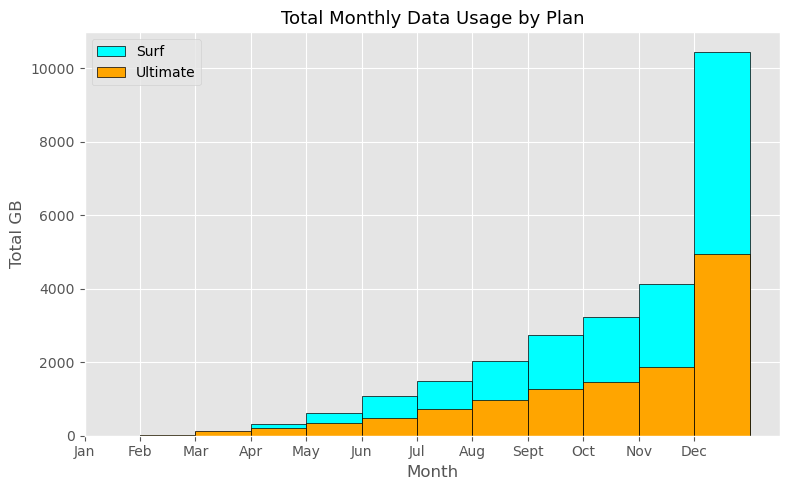

In [242]:
# Comparing the total volume of data users of each plan require each month:

surf = df.query("plan == 'surf'")
ult = df.query("plan == 'ultimate'")

plt.figure(figsize=(8,5))

plt.hist(x = surf['month'], weights=surf['data_used'], edgecolor='black',color='cyan',bins=11, label='Surf')
plt.hist(x = ult['month'], weights=ult['data_used'], edgecolor='black',color='orange',bins=11, label='Ultimate')


plt.style.use('ggplot')
plt.title('Total Monthly Data Usage by Plan', fontsize=13) 
plt.legend(loc='upper left')
plt.xlabel('Month')
plt.ylabel('Total GB')

(plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 
            labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"])
           )

plt.tight_layout()
 
plt.show()

In [243]:
# Calculating the monthly data usage mean and variance for each plan:

print("<Surf Users>")
print("Monthly data usage Mean: ", df.query("plan == 'surf'").data_used.mean())
print("Monthly data usage Variance: ", df.query("plan == 'surf'").data_used.var())
print()
print("<Ultimate Users>")
print("Monthly data usage Mean: ", df.query("plan == 'ultimate'").data_used.mean())
print("Monthly data usage Variance: ", df.query("plan == 'ultimate'").data_used.var())

<Surf Users>
Monthly data usage Mean:  16.670692943420217
Monthly data usage Variance:  61.58359983759016

<Ultimate Users>
Monthly data usage Mean:  17.306944444444444
Monthly data usage Variance:  58.83054976046968


**Observations:**
<br>
Just like our calls data, user behaviour is strikingly similar. We can observe a similar distribution of data usage amongst both plans across the year when we approximate the sample size of Ultimate users to the larger sample size of Surf users. We can confirm this by observing similar mean and variance values.

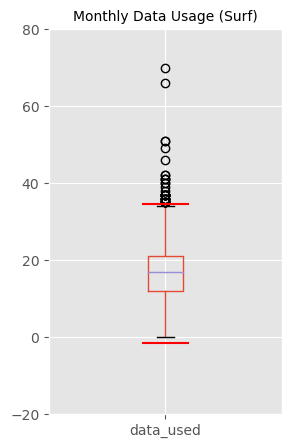

<Surf Plan>
Median:  17.0
Quartile 1: 12.0
Quartile 3: 21.0


In [244]:
# Plotting a boxplot to visualize the distribution of monthly data usage for all users of the Surf plan:

Q1 = df.query("plan == 'surf'")['data_used'].quantile(0.25)
Q3 = df.query("plan == 'surf'")['data_used'].quantile(0.75)
IQR = Q3 - Q1

(df
 .query("plan == 'surf'")
 .boxplot(column=['data_used'], grid=True, figsize=(3,5))
)

plt.title('Monthly Data Usage (Surf)', fontsize=10)

plt.ylim(-20, 80)
plt.hlines(y=Q1-1.5*IQR, xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=Q3+1.5*IQR, xmin=0.9, xmax=1.1, color='red')

plt.show()
 
print("<Surf Plan>")
print("Median: ",  df.query("plan == 'surf'")['data_used'].median())
print("Quartile 1:", Q1)
print("Quartile 3:", Q3)

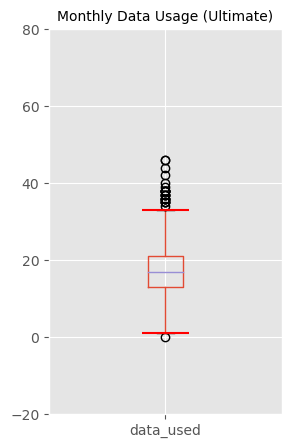

<Surf Plan>
Median:  17.0
Quartile 1: 13.0
Quartile 3: 21.0


In [245]:
# Plotting a boxplot to visualize the distribution of monthly data usage for all users of the Surf plan:

Q1 = df.query("plan == 'ultimate'")['data_used'].quantile(0.25)
Q3 = df.query("plan == 'ultimate'")['data_used'].quantile(0.75)
IQR = Q3 - Q1

(df
 .query("plan == 'ultimate'")
 .boxplot(column=['data_used'], grid=True, figsize=(3,5))
)

plt.title('Monthly Data Usage (Ultimate)', fontsize=10)

plt.ylim(-20, 80)
plt.hlines(y=Q1-1.5*IQR, xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=Q3+1.5*IQR, xmin=0.9, xmax=1.1, color='red')

plt.show()
 
print("<Surf Plan>")
print("Median: ",  df.query("plan == 'ultimate'")['data_used'].median())
print("Quartile 1:", Q1)
print("Quartile 3:", Q3)

**Observations:**
<br>Similar to our means and variances, our median values for both plans together with their respective Q1,Q3 figures are almost identical. Our only observed difference is our Q1 dipersion values.

In [246]:
# Filtering out Surf outliers to get unskewed mean and variance values:

Q1 = df.query("plan == 'surf'")['data_used'].quantile(0.25)
Q3 = df.query("plan == 'surf'")['data_used'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

print("<Surf Plan>")
print()
print("Mean:", df.query("plan == 'surf'")\
        .query("data_used >= @lower and data_used <= @upper")['data_used'].mean())
print("Variance:", df.query("plan == 'surf'")\
        .query("data_used >= @lower and data_used <= @upper")['data_used'].var())

<Surf Plan>

Mean: 16.14100064977258
Variance: 48.49571057152119


In [247]:
# Filtering out Ultimate outliers to get unskewed mean and variance values:

Q1 = df.query("plan == 'ultimate'")['data_used'].quantile(0.25)
Q3 = df.query("plan == 'ultimate'")['data_used'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

print("<Ultimate Plan>")
print()
print("Mean:", df.query("plan == 'ultimate'")\
        .query("data_used >= @lower and data_used <= @upper")['data_used'].mean())
print("Variance:", df.query("plan == 'ultimate'")\
        .query("data_used >= @lower and data_used <= @upper")['data_used'].var())

<Ultimate Plan>

Mean: 16.556998556998558
Variance: 43.723986354044115


**Observations:**
<br>
After the missing value treatment, we got even closer figures for our means and variance regarding both plans.

**Intermediate Conclusion - Internet:**
<br> With how our bar charts and histogram showed no significant variations between plans, we can conclusively state that users of both Surf and Ultimate exhibit identical behavioral patterns in terms of internet usage. We confirmed this statement by observing similar median and quartile values between the both of them, coupled with even more similar figures for outlier-filtered data. With regards to data usage, our users are extremely similar. ***Just as important, is the fact that based solely off of average usage, users of the Surf plan are consistently exceeding their data plan limits (15 Gb). Ultimate users are very much far away from exceeding theirs (30 Gb).***

## 6.3 Messages <a name="ubmessages"></a>

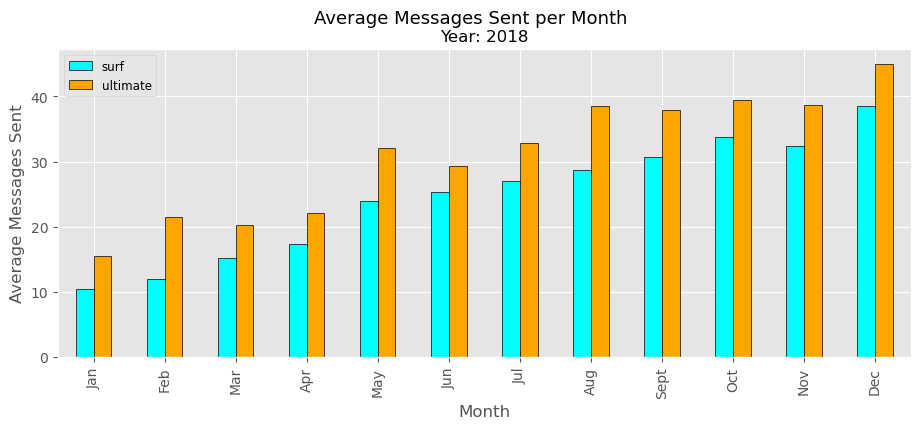

In [248]:
# Comparing average messages sent by month for each plan:

(df
 .pivot_table(index='month', columns='plan', values='messages_sent', aggfunc='mean')
 .plot(kind='bar', grid=True, edgecolor='black', color=['cyan', 'orange'], figsize=(11,4))
)

plt.style.use('ggplot')
plt.suptitle('Average Messages Sent per Month', fontsize=13)
plt.title('Year: 2018', fontsize=12)
plt.legend(loc='upper left', prop={'size': 8.5})

plt.ylabel('Average Messages Sent', fontsize=12)
plt.xlabel('Month', fontsize=12)

(plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 
            labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"])
           )

plt.show()

In [249]:
# Getting the difference in means between both plans for overall monthly calls duration:

print("Surf Call Duration Mean:", \
      df.query("plan == 'surf'").messages_sent.mean())

print("Ultimate Call Duration Mean:", \
      df.query("plan == 'ultimate'").messages_sent.mean())

Surf Call Duration Mean: 31.15956770502225
Ultimate Call Duration Mean: 37.55138888888889


**Observations:**
<br>
As per prior plots, we will be excluding observations in the first 4 months of the year due to a lack of user data. For the remaining months, we can see a notable uptick in messages sent for our Ultimate users when compared to Surf users. In fact, this is consistent with the majority of the entire year. Our aggregate messages sent per month between plans is approximately 6, and is a considerable distinction. We may conclude that based off of overall monthly messages sent, Ultimate users intrinsically send more messages, but not nearly enough to justify them picking the ultimate plan based off free messages alone. (free messages: (1) Surf = 50, (2) Ultimate = 1000)

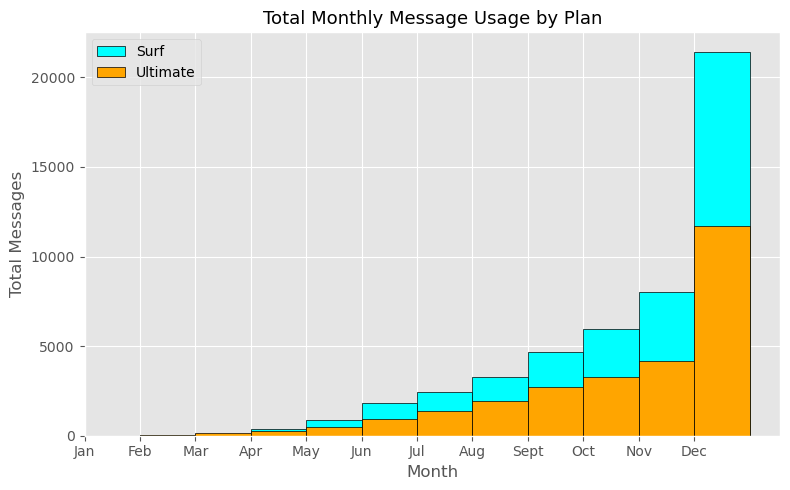

In [250]:
# Comparing the total monthly messages users of each plan require:

surf = df.query("plan == 'surf'")
ult = df.query("plan == 'ultimate'")

plt.figure(figsize=(8,5))

plt.hist(x = surf['month'], weights=surf['messages_sent'], edgecolor='black',color='cyan',bins=11, label='Surf')
plt.hist(x = ult['month'], weights=ult['messages_sent'], edgecolor='black',color='orange',bins=11, label='Ultimate')


plt.style.use('ggplot')
plt.title('Total Monthly Message Usage by Plan', fontsize=13) 
plt.legend(loc='upper left')
plt.xlabel('Month')
plt.ylabel('Total Messages')

(plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 
            labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"])
           )

plt.tight_layout()
 
plt.show()

In [251]:
# Calculating the monthly message usage mean and variance for each plan:

print("<Surf Users>")
print("Monthly message usage Mean: ", df.query("plan == 'surf'").messages_sent.mean())
print("Monthly message usage Variance: ", df.query("plan == 'surf'").messages_sent.var())
print()
print("<Ultimate Users>")
print("Monthly message usage Mean: ", df.query("plan == 'ultimate'").messages_sent.mean())
print("Monthly message usage Variance: ", df.query("plan == 'ultimate'").messages_sent.var())

<Surf Users>
Monthly message usage Mean:  31.15956770502225
Monthly message usage Variance:  1126.7245219504082

<Ultimate Users>
Monthly message usage Mean:  37.55138888888889
Monthly message usage Variance:  1208.756743548134


**Observations:**
<br>
Purely from observation of our histogram and approximated for equal sample sizes between both plans, our bar chart conclusions were accurate, in that Ultimate users slightly outweigh its Surf counterparts in monthly message usage. Our means have a notable distinction of about 6 messages sent.  
<br>
<br>However, there's a caveat; the Ultimate plans includes 1000 free messages, which begs the question if the Ultimate plan premium of \\$50 over the Surf plan price is worth it. 

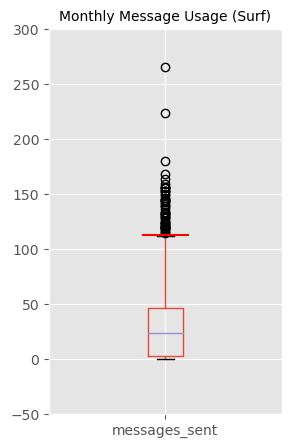

<Surf Plan>
Median:  24.0
Quartile 1: 3.0
Quartile 3: 47.0


In [252]:
# Plotting a boxplot to visualize the distribution of monthly message usage for all users of the Surf plan:

Q1 = df.query("plan == 'surf'")['messages_sent'].quantile(0.25)
Q3 = df.query("plan == 'surf'")['messages_sent'].quantile(0.75)
IQR = Q3 - Q1

(df
 .query("plan == 'surf'")
 .boxplot(column=['messages_sent'], grid=True, figsize=(3,5))
)

plt.title('Monthly Message Usage (Surf)', fontsize=10)

plt.ylim(-50, 300)
plt.hlines(y=Q1-1.5*IQR, xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=Q3+1.5*IQR, xmin=0.9, xmax=1.1, color='red')

plt.show()
 
print("<Surf Plan>")
print("Median: ",  df.query("plan == 'surf'")['messages_sent'].median())
print("Quartile 1:", Q1)
print("Quartile 3:", Q3)

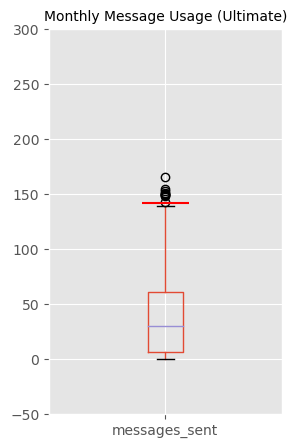

<Ultimate Plan>
Median:  30.0
Quartile 1: 7.0
Quartile 3: 61.0


In [253]:
# Plotting a boxplot to visualize the distribution of monthly message usage for all users of the Ultimate plan:

Q1 = df.query("plan == 'ultimate'")['messages_sent'].quantile(0.25)
Q3 = df.query("plan == 'ultimate'")['messages_sent'].quantile(0.75)
IQR = Q3 - Q1

(df
 .query("plan == 'ultimate'")
 .boxplot(column=['messages_sent'], grid=True, figsize=(3,5))
)

plt.title('Monthly Message Usage (Ultimate)', fontsize=10)

plt.ylim(-50, 300)
plt.hlines(y=Q1-1.5*IQR, xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=Q3+1.5*IQR, xmin=0.9, xmax=1.1, color='red')

plt.show()
 
print("<Ultimate Plan>")
print("Median: ",  df.query("plan == 'ultimate'")['messages_sent'].median())
print("Quartile 1:", Q1)
print("Quartile 3:", Q3)

**Observations:**
<br>
The observations with our boxplots and quartile values confirm our prior conclusions; a difference of 6 messages were observed. Most importantly, we see quite a few extreme outliers beyond the upper limit of our Surf data.

In [254]:
# Filtering out Surf outliers to get unskewed mean and variance values:

Q1 = df.query("plan == 'surf'")['messages_sent'].quantile(0.25)
Q3 = df.query("plan == 'surf'")['messages_sent'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

print("<Surf Plan>")
print()
print("Mean:", df.query("plan == 'surf'")\
        .query("messages_sent >= @lower and messages_sent <= @upper")['messages_sent'].mean())
print("Variance:", df.query("plan == 'surf'")\
        .query("messages_sent >= @lower and messages_sent <= @upper")['messages_sent'].var())

<Surf Plan>

Mean: 27.473061760841
Variance: 721.7589714215611


In [255]:
# Filtering out Ultimate outliers to get unskewed mean and variance values:

Q1 = df.query("plan == 'ultimate'")['messages_sent'].quantile(0.25)
Q3 = df.query("plan == 'ultimate'")['messages_sent'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

print("<Ultimate Plan>")
print()
print("Mean:", df.query("plan == 'ultimate'")\
        .query("messages_sent >= @lower and messages_sent <= @upper")['messages_sent'].mean())
print("Variance:", df.query("plan == 'ultimate'")\
        .query("messages_sent >= @lower and messages_sent <= @upper")['messages_sent'].var())

<Ultimate Plan>

Mean: 35.94788732394366
Variance: 1039.9563777588


**Observations:**
<br>
Our difference in means have grown to about 8.5 messages in favor of Ultimate users. This more than confirms our prior analysis, in that Ultimate users intrinsically send more messages than Surf users.

**Intermediate Conclusion:**
<br>
From our bar charts and histograms, we can infer that Ultimate users differ from Surf users in that they send more messages every month and would warrant getting a prepaid plan that accounts for that if that is all we look at. Our central tendency and dispersion values of both skewed and unskewed data confirm this observation. 
<br>Whether they are getting good value from the Ultimate plan (1000 included messages) based on their usage is not for us to judge, as there could be a variety of reasons for doing so, such as overestimating their initial usage based on their past experience, or merely just as a safety net. But overall, we can conclusively say there is some difference in behaviour between users of each plan in terms of messages sent in an average month.
<br>
<br> There is one caveat however, in that the Ultimate plan includes 1000 messages per month, and hence we can assume that Ultimate users are wildly overpaying from a messages aspect. Perhaps sending messages isn't a top priority to these users then, when determining which plan to purchase. ***However, it is important to note the fact that based solely off of average usage, users of the Surf plan have a lower buffer to exceeding their plan limits (50 messages). Ultimate users are very much far away from exceeding their limits (1000 messages).***

## 6.4 Age Groups <a name="ubage"></a>

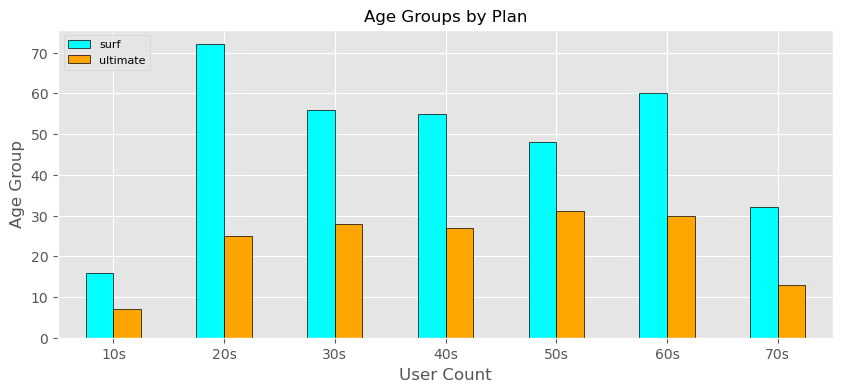

In [256]:
# Comparing age group value counts between both plans:

(df_users
 .pivot_table(index='age_group', columns='plan', values='user_id', aggfunc='count')
 .plot(kind='bar', grid=True, edgecolor='black', color=['cyan', 'orange'], figsize=(10,4))
)

plt.title('Age Groups by Plan', fontsize=12)
plt.legend(loc='upper left', prop={'size': 8})
plt.ylabel('Age Group', fontsize=12)
plt.xlabel('User Count', fontsize=12)

plt.xticks(rotation=360)

plt.show()

In [257]:
# Getting the average age for both plans:

display(df_users.pivot_table(index='plan', values='age', aggfunc='mean'))
df_users.pivot_table(index='plan', values='age', aggfunc='median')

,age
plan,
surf,44.952802
ultimate,46.608696


,age
plan,
surf,45
ultimate,48


**Observations and Conclusion:**
<br>
<br>
We'd like to see a higher average age for our ultimate users, as that will indicate higher spending power and thus, the ability to afford a higher plan premium. Unfortunately, this wasn't the case whereby the average age for both plans were within striking distance of each other (approximately 45 - 48 years). We can conclude from analyzing age groups that age isn't a determining factor when it comes to choosing a phone plan, and hence user characteristics are similar with respect to age demographics.

## 6.5 Location <a name="ublocation"></a>

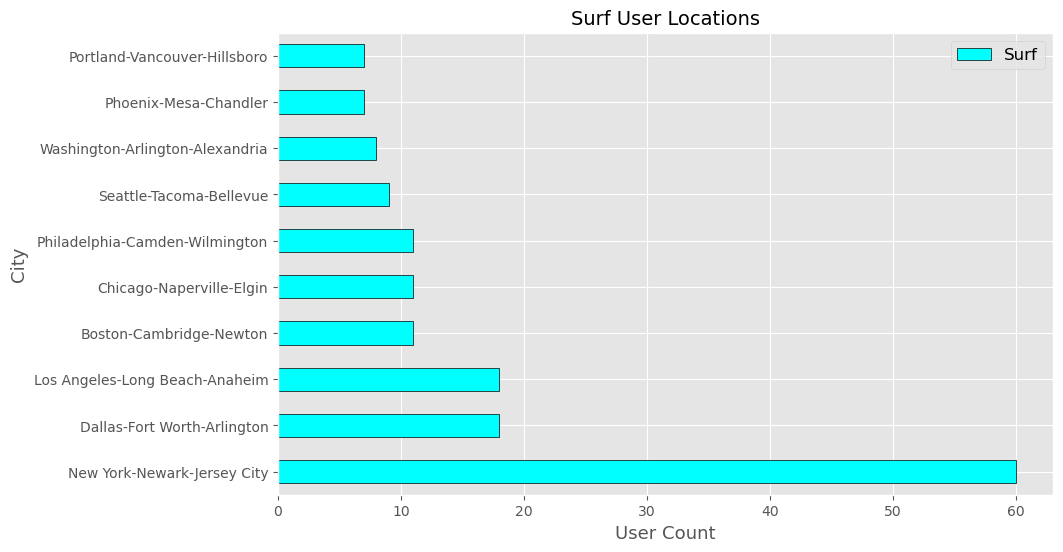

In [258]:
# Observing city value counts for the Surf plan:

surf = df_users.query("plan=='surf'")
top10 = surf['city'].value_counts().index[:10]
df_location = surf[surf['city'].isin(top10)]

(df_location
 .pivot_table(index='city', values='user_id', aggfunc='count').sort_values('user_id', ascending=False)
 .plot(kind='barh', grid=True, edgecolor='black', color='cyan', figsize=(10,6))
)

plt.title('Surf User Locations', fontsize=14)
plt.legend(['Surf'], loc='upper right', prop={'size': 12})
plt.ylabel('City', fontsize=13)
plt.xlabel('User Count', fontsize=13)

plt.xticks(rotation=360)

plt.show()

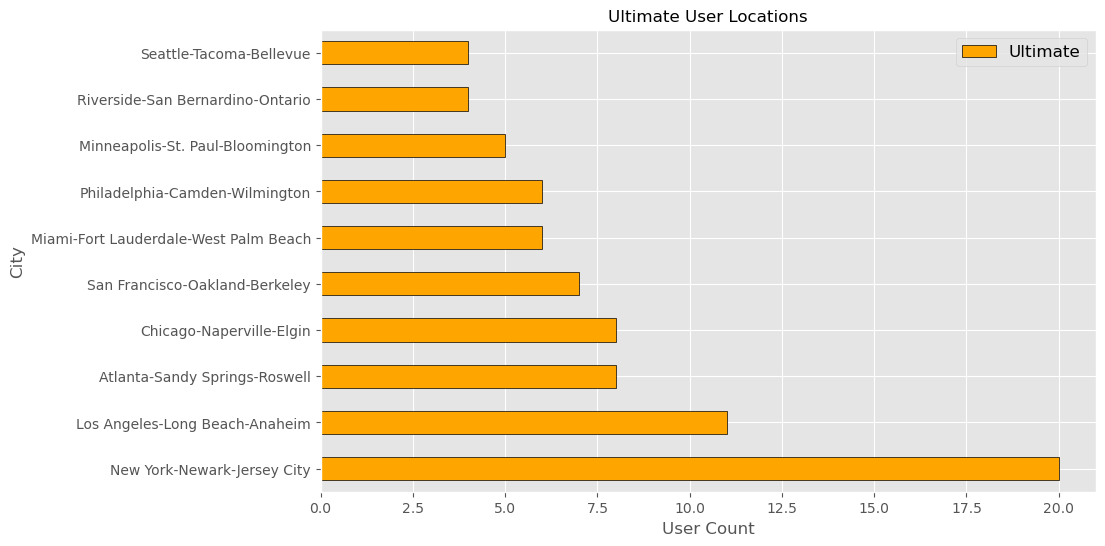

In [259]:
# Observing city value counts for the Ultimate plan:

ult = df_users.query("plan=='ultimate'")
top10 = ult['city'].value_counts().index[:10]
df_location = ult[ult['city'].isin(top10)]

(df_location
 .pivot_table(index='city', values='user_id', aggfunc='count').sort_values('user_id', ascending=False)
 .plot(kind='barh', grid=True, edgecolor='black', color='orange', figsize=(10,6))
)

plt.title('Ultimate User Locations', fontsize=12)
plt.legend(['Ultimate'], loc='upper right', prop={'size': 12})
plt.ylabel('City', fontsize=12)
plt.xlabel('User Count', fontsize=12)

plt.xticks(rotation=360)

plt.show()

In [260]:
# Getting distribution share of NY-NJ users:

(df_users['city'] == 'New York-Newark-Jersey City').mean()

0.16

**Observations and Conclusion:**
<br>
<br>
Our observations of user geographical demographics are quite similar. Our top 10 most observed locations shows some similarities, the most obvious being the NY-NJ area which makes up a large share of our population, tallying 16%. This is consistent with our findings so far, in that user behaviour, age demographics and now geographical demographics are inherently quite similar to each other. ***It would not be fair then to conclude that a user's choice of plan is dictated by affordability/budget constraints and other income variables.***

# 7. Revenue Study<a name="revenue"></a>

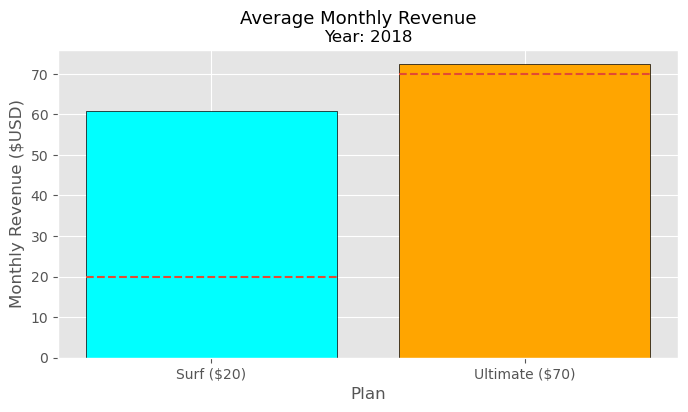

In [261]:
# Comparing average monthly revenue for both plans:

df_revenue = df.pivot_table(index='plan', values='revenue', aggfunc='mean').reset_index(drop=True)
df_revenue = pd.concat([df_revenue, df[['plan', 'plan_price']]], axis=1)
df_revenue.dropna(inplace=True)

plt.figure(figsize=(8,4))

ax = plt.bar(x=df_revenue.index, height=df_revenue['revenue'], color=['cyan', 'orange'], edgecolor='black')

for index, value in enumerate(np.array(df_revenue.plan_price.sort_values())):
    plt.hlines(y=value, 
               xmin = ax.patches[index].get_x(), 
               xmax = ax.patches[index].get_x() + ax.patches[index].get_width(),
               linestyle='--') 
    
plt.suptitle('Average Monthly Revenue', fontsize=13)
plt.title('Year: 2018', fontsize=12)

plt.ylabel('Monthly Revenue ($USD)', fontsize=12)
plt.xlabel('Plan', fontsize=12)
(plt.xticks(ticks=[0, 1], 
            labels=["Surf ($20)", "Ultimate ($70)"],
           rotation=360)
           )

plt.show()

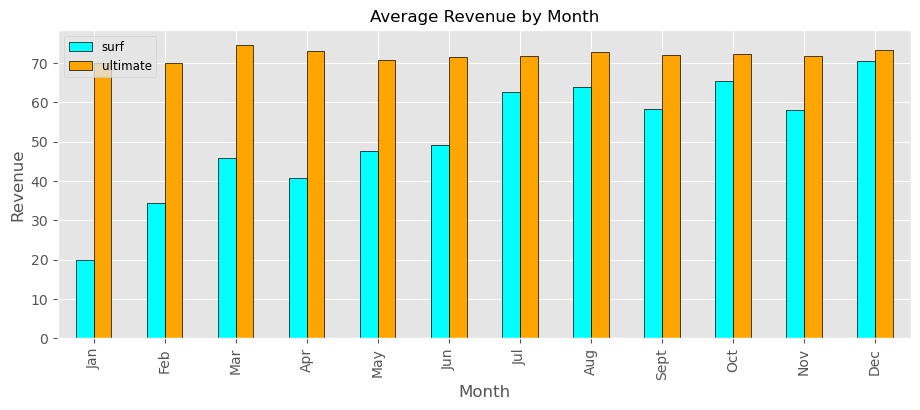

In [262]:
# Comparing monthly revenue for each plan:

(df
 .pivot_table(index='month', columns='plan', values='revenue', aggfunc='mean')
 .plot(kind='bar', grid=True, edgecolor='black', color=['cyan', 'orange'], figsize=(11,4))
)

plt.style.use('ggplot')
plt.title('Average Revenue by Month', fontsize=12)
plt.legend(loc='upper left', prop={'size': 8.5})

plt.ylabel('Revenue', fontsize=12)
plt.xlabel('Month', fontsize=12)

(plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 
            labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"])
           )

plt.show()

In [263]:
# Getting the difference in means between both plans for overall monthly revenue:

print("Surf Revenue Mean:", \
      df.query("plan == 'surf'").revenue.mean())

print("Ultimate Revenue Mean:", \
      df.query("plan == 'ultimate'").revenue.mean())

Surf Revenue Mean: 60.70640813731713
Ultimate Revenue Mean: 72.31388888888888


**Observations:**
<br>
For our Ultimate users, revenue tends to stagnate just above the baseline price of \\$70. In contrast, Surf users consistently display revenue figures way beyond their baseline price of \\$20. There is a steady increase of revenue the later we get through the year, which is explained by more users signing up every other month. The key here is the percentage increase over baseline here, whereby Surf users are exhibiting about a 200% increase over the baseline of \\$20.

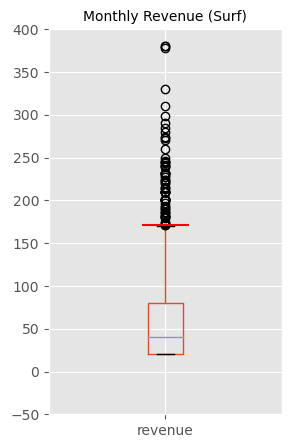

<Surf Plan>
Median:  40.36
Quartile 1: 20.0
Quartile 3: 80.36


In [264]:
# Plotting a boxplot to visualize the distribution of monthly revenue for all users of the Surf plan:

Q1 = df.query("plan == 'surf'")['revenue'].quantile(0.25)
Q3 = df.query("plan == 'surf'")['revenue'].quantile(0.75)
IQR = Q3 - Q1

(df
 .query("plan == 'surf'")
 .boxplot(column=['revenue'], grid=True, figsize=(3,5))
)

plt.title('Monthly Revenue (Surf)', fontsize=10)

plt.ylim(-50, 400)
plt.hlines(y=Q1-1.5*IQR, xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=Q3+1.5*IQR, xmin=0.9, xmax=1.1, color='red')

plt.show()
 
print("<Surf Plan>")
print("Median: ",  df.query("plan == 'surf'")['revenue'].median())
print("Quartile 1:", Q1)
print("Quartile 3:", Q3)

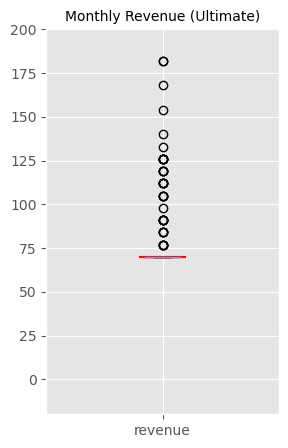

<Ultimate Plan>
Median:  70.0
Quartile 1: 70.0
Quartile 3: 70.0


In [265]:
# Plotting a boxplot to visualize the distribution of monthly revenue for all users of the Ultimate plan:

Q1 = df.query("plan == 'ultimate'")['revenue'].quantile(0.25)
Q3 = df.query("plan == 'ultimate'")['revenue'].quantile(0.75)
IQR = Q3 - Q1

(df
 .query("plan == 'ultimate'")
 .boxplot(column=['revenue'], grid=True, figsize=(3,5))
)

plt.title('Monthly Revenue (Ultimate)', fontsize=10)

plt.ylim(-20, 200)
plt.hlines(y=Q1-1.5*IQR, xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=Q3+1.5*IQR, xmin=0.9, xmax=1.1, color='red')

plt.show()
 
print("<Ultimate Plan>")
print("Median: ",  df.query("plan == 'ultimate'")['revenue'].median())
print("Quartile 1:", Q1)
print("Quartile 3:", Q3)

In [266]:
# Filtering out Surf outliers to get unskewed mean and variance values:

Q1 = df.query("plan == 'surf'")['revenue'].quantile(0.25)
Q3 = df.query("plan == 'surf'")['revenue'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

print("<Surf Plan>")
print()
print("Mean:", df.query("plan == 'surf'")\
        .query("revenue >= @lower and revenue <= @upper")['revenue'].mean())
print("Variance:", df.query("plan == 'surf'")\
        .query("revenue >= @lower and revenue <= @upper")['revenue'].var())

<Surf Plan>

Mean: 52.37644474034616
Variance: 1424.2971123350655


In [267]:
# Filtering out Surf outliers to get unskewed mean and variance values:

Q1 = df.query("plan == 'ultimate'")['revenue'].quantile(0.25)
Q3 = df.query("plan == 'ultimate'")['revenue'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

print("<Ultimate Plan>")
print()
print("Mean:", df.query("plan == 'ultimate'")\
        .query("revenue >= @lower and revenue <= @upper")['revenue'].mean())
print("Variance:", df.query("plan == 'ultimate'")\
        .query("revenue >= @lower and revenue <= @upper")['revenue'].var())

<Ultimate Plan>

Mean: 70.0
Variance: 0.0


**Observation:**
<br>
Our unskewed data has reduced our mean of Surf monthly revenue to \\$52. This is still a very notable 160% increase over the baseline of \\$20. On the other hand, Ultimate monthly revenue had remained at its baseline of \\$20.

**Intermediate Conclusion:**
<br> Users from the Surf plan bring in more revenue in contrast to users from the Ultimate plan, as they consistently overspend by an average of 160% from their base plan rate. We have to take into consideration that the base plan rates and respective surcharge rates of either plans have already been calculated based off of cost and budgeting expenses. These can be considered as constant variables, and ***anything beyond that can be considered as added profit to the company.***

# 8.0 Statistical Hypothesis Testing <a name="hypo"></a>

## 8.1  Average revenue from users of the Ultimate and Surf calling plans differs <a name="hypo1"></a>

**Null Hypothesis - H_0:**
<br>Average revenue of Surf  ==  Average revenue of Ultimate
<br><br> **Alternative Hypothesis - H_1:**
<br>Average revenue of Surf  !=  Average revenue of Ultimate

In [268]:
# Getting revenue variance values:

display(df.query("plan == 'surf'").revenue.var())
df.query("plan == 'ultimate'").revenue.var()

3067.8351522938633

129.8484855509191

In [269]:
# Testing the hypothesis that average revenue differs between both plans:

surf = df.query("plan == 'surf'").revenue
ult = df.query("plan == 'ultimate'").revenue

alpha = 0.05

results = st.ttest_ind(surf, ult, equal_var = False)
print('p-value:', results.pvalue) 

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


p-value: 3.1703905481135734e-15
We reject the null hypothesis


**Observations and Conclusion:**
<br>
We have a strong case for accepting our alternate hypothesis, in that revenue differs between both plans. The bigger question is, how much more revenue does a specific plan generate from its respective baseline rate.

## 8.2  Average revenue from users in the NY-NJ area differs from that of the users from the other regions <a name="hypo2"></a>

**Null Hypothesis - H_0:** 
<br>Avg revenue of users in NY-NJ == Avg revenue of users from all other locations.
<br>
<br>
**Alternative Hypothesis - H_1:** 
<br>Avg revenue of users in NY-NJ != Avg revenue of users from all other locations. 

In [270]:
# Filtering our New York-Newark-Jersey City users and the rest of the population:

ny = df.query("city == 'New York-Newark-Jersey City'")
pop = df.query("city != 'New York-Newark-Jersey City'")

In [271]:
# Getting the monthly revenue variances for both populations:

print(ny.revenue.var())
print(pop.revenue.var())


1895.545689920425
2225.0479943519067


In [272]:
# Testing the hypothesis that average revenue differs between New York-Newark-Jersey City:

alpha = 0.05

results = st.ttest_ind(ny.revenue, pop.revenue, equal_var = False)
print('p-value:', results.pvalue) 

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.0335256158853001
We reject the null hypothesis


In [273]:
# Getting the difference in revenue mean between the NY-NJ population and the of our population:

display(ny.revenue.mean())
pop.revenue.mean()

59.92135278514591

65.22277139874733

In [274]:
# Getting plan value counts and percentage share from both the NY-NJ and rest of the population:

display(ny.plan.value_counts())
display(pop.plan.value_counts())

display((ny['plan'] == 'surf').mean())
display((pop['plan'] == 'surf').mean())

surf        312
ultimate     65
Name: plan, dtype: int64

surf        1261
ultimate     655
Name: plan, dtype: int64

0.8275862068965517

0.6581419624217119

**Observations and Conclusion:**
<br>
We can accept our alternative hypothesis that average revenue between both populations are different. The New York-Newark-Jersey City region contains the largest relative share of our user data; having said that, most of our NY-NJ users are of the Surf plan, with Surf users accounting for 82% share. In contrast, Surf users make up 65% share of the rest of our population. This explains the disparity in average revenue between both populations.

# 9. General conclusion <a name="gc"></a>

 ## 9.1 Data Cleaning Overview <a name="gc1"></a>

1. Plans Data: 
    - Internet data included column was changed from the MB measurement to GB.
2. Users Data:
    - Missing values found in 'churn_date' was due to users still being subscribed to the plan. We filled in these missing values with the last day of the 2018 calender.
    - Converted 'reg_date' and 'churn_date' to DateTime objects.
    - Split our city column into 'city' and 'state' columns for better readability.
3. Call Data:    
    - 'call date' was converted to the DateTime object.
    - 'duration' was rounded up to the next minute, as Megaline charges by minute intervals.
    - 'duration' 0 values were observed, possibly signifying that a user did not get through to the opposing line; these were dropped.
4. Internet Data:
    - 'session_date' was converted to the DateTime object.
    - 'mb_used' was converted to the GB unit of measurement.
    - We found 0 values in our 'gb_used' column which appear to be because users had logged on without surfing the internet. These were dropped.
5. Message Data
    - 'message_date' was converted to the DateTime object.
   

## 9.2  Features Engineering Overview <a name="gc2"></a>

1. Users Data:
    - Created a new column of age groups
    - Created new columns of total days and months subscribed to a plan
    - We found entries in tota months where the user had only been subscribed for less than a month. We replaced these values with 1.
2. Calls Data:
    - Extracted month values from 'call_date'
3. Internet Data:
    - Extracted month values from 'session_date'
4. Messages Data:
    - Extracted month values from 'message_date'

## 9.3  Data Transformation Overview <a name="gc3"></a>

1. Calculated monthly [call, data and message] usage for each user.
2. Calculated monthly [call, data and message] surcharge for each user.
3. Calculated monthly revenue for each user by summing monthly surcharge and plan price.
4. Merged usage, surcharge and revenue to consolidate all datasets into one DataFrame.

## 9.4  Conclusive Overview on Average Revenue  <a name="gc4"></a>

To answer our question on which plan generates the most revenue for Megaline, we first need to answer the question if users of both plans exhibit similar behaviour. Only by determining behaviour a constant variable can we use our 2 prepaid plans as determining variables. 
<br>
>1. Call Data - Surf and Ultimate users more or less exhibit similar call-minute averages throughout the year, when grouped by individual months. When we analyzed total monthly usages, both plans exhibited similar properties when approximated to the same sample size. We also found skewed and unskewed central tendency and dispersion values that were within striking distance of each other. We concluded that our call data behaviours were similar between both plans. 
<br>
2. Internet Data - Similar to our Call Data, there wasn't any observable differences between average data usage between plans when grouped by individual months. Neither was there any perceivable difference when analyzing total monthly data usage amongst each plan. These observations were confirmed with similar skewed and unskewed mean and variance values for our 'data_used' column. We concluded that our internet data behaviours were similar across both plans.
<br>
3. Messages Data - This is the only instance we've observed some notable difference between both prepaid plans. Our monthly charts show a slight increase in average messages sent across all substantially populated months for Ultimate users compared to Surf users. When looking total usage, this was confirmed by observing an unskewed average of 8 more messages sent for Ultimate users in contrast to Surf users. We could call it a day and conclude we have a nuanced behavioural pattern between both plans, but we also have to consider that the difference is very marginal when we take into account the amount of messages included in the Ultimate plan (1000). It is then prudent to conclude that while there is a perceivable difference in messages sent between both prepaid plans, it is marginal at best and user behaviour just slightly differ from one another.
<br>
4. Age Data - Our age group central tendency scores exhibit very similar values. While we did hope to see some form of age spike in our Ultimate users which would exhibit some form of income variable in play, we unfortunately didn't and can only conclude that both prepaid plans contain users of a similar age demographic, and to an extent, income demographic.
<br>
5. City Data - Geographical demographic analysis just as well produced similar results. Our bigger cities in the United States had an even representation between both prepaid plans (especially so for the NY-NJ area with a 16% share). It would then not be fair to say this is a case of affordability and budget constraints, when we consider the affluence and wage disparity between bigger metropolitan areas compared to their smaller counterparts.
<br>
<br>

**Overall Conclusion on Revenue:**
<br> 
<br>
To recap - Our revenue values were calculated based off of the base plan price, coupled with any extra surcharges for usage past the plan limits. That being said, our bar chart on average revenue for each plan showcased a couple of things.
<br>
1. Ultimate users were overpaying by an average of about \\$2 when compared to their base plan rate (\\$70). When outlier treatment was applied, Ultimate users did not exceed any limits and thus, did not overpay.
2. Surf users on the other hand were overpaying by an average of about \\$40 in relation to their base plan rate (\\$20). When outlier treatment was applied, this figure dropped down to \\$32. 
<br>

We have to understand that plan prices and their respective surcharge rates have been predetermined based off of numerous overhead cost and budget calculations. Our plan prices then can be considered as baseline variables, and our surcharge rates as extra revenue on top of the plan price in question. This is true regardles of the total overall observable revenue depicted in our plots, and thus, revenue generation should be looked at individually via any extra surcharges as a percentage of the baseline price, and not as a whole figure by itself. 
<br>
<br>
***Our Hypothesis is accepted. While our Ultimate plan provides a consistent stream of revenue, it is our Surf plan that brings in additional revenue based on the dynamism of customer usages and the increasing likelihood a customer might exceed the gazetted limits placed on the plan.***

>